In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


In [25]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [27]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [29]:
#keras only takes numpy array
training_set = dataset_train.iloc[:, 1: 2].values

In [31]:
training_set.shape

(1258, 1)

In [33]:
sc = MinMaxScaler(feature_range = (0, 1))
#fit: get min/max of train data
training_set_scaled = sc.fit_transform(training_set)

In [35]:
## 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
 X_train.append(training_set_scaled[i-60: i, 0])
 y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [37]:
X_train.shape

(1198, 60)

In [39]:
 sc = MinMaxScaler(feature_range = (0, 1))
#fit: get min/max of train data
training_set_scaled = sc.fit_transform(training_set)

# creating data structure

In [42]:

## 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
 X_train.append(training_set_scaled[i-60: i, 0])
 y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [44]:
X_train.shape


(1198, 60)

In [48]:
y_train.shape


(1198,)

In [50]:

X_train = np.reshape(X_train, newshape =
 (X_train.shape[0], X_train.shape[1], 1))

In [52]:
X_train.shape

(1198, 60, 1)

# exploratory data analysIS

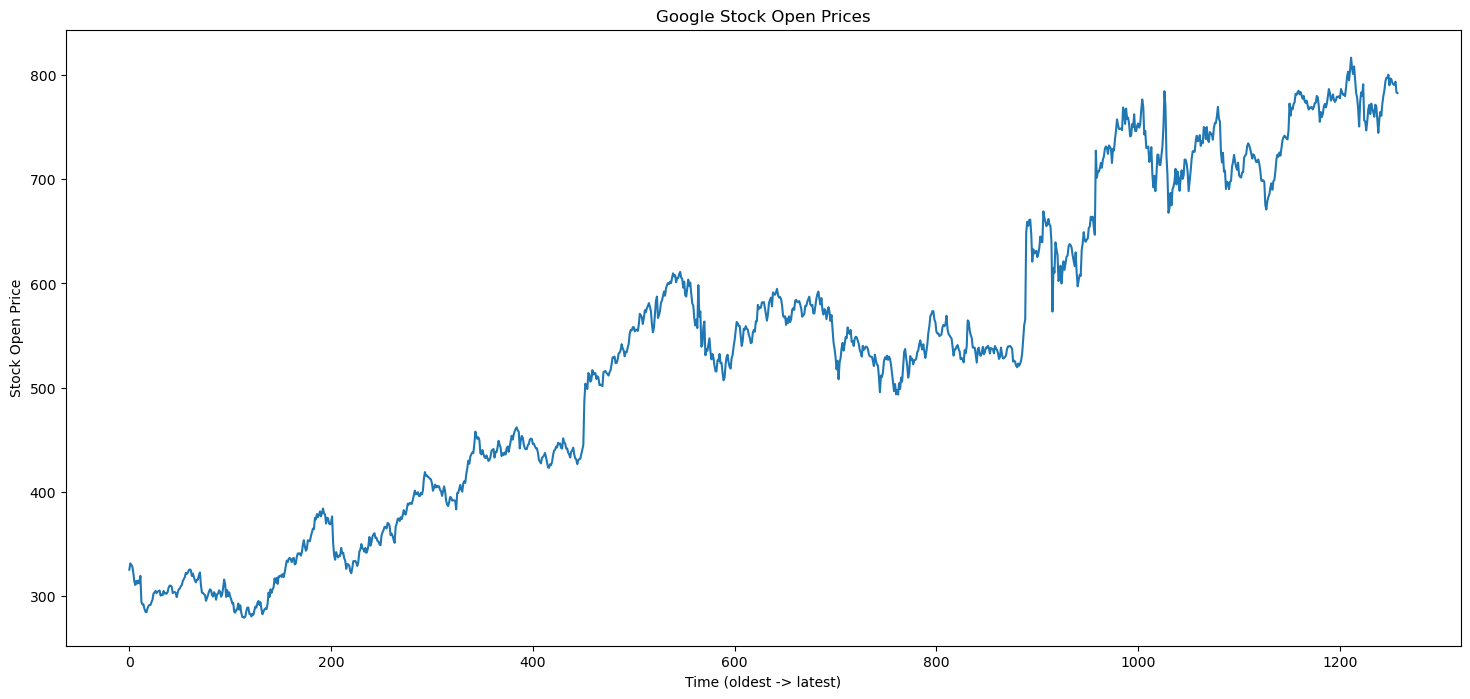

In [55]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()


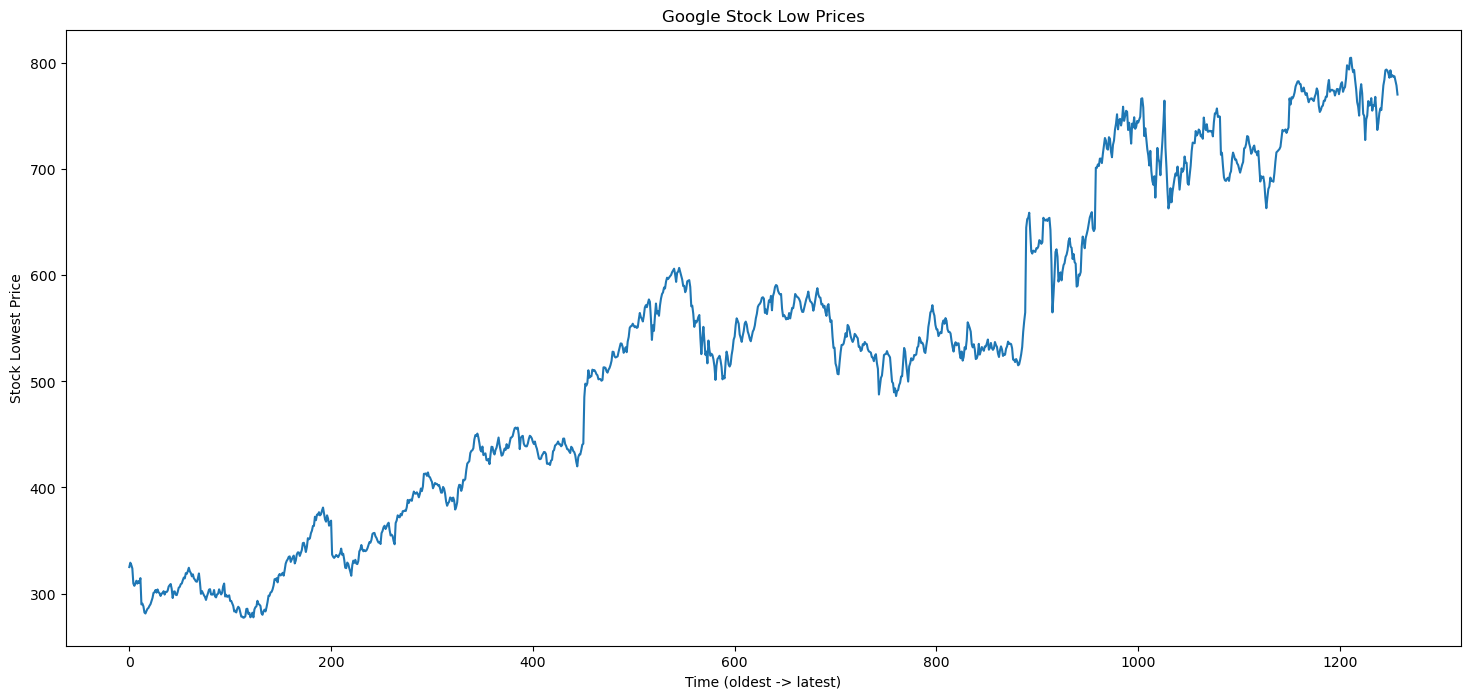

In [57]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Low'])
plt.title("Google Stock Low Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Lowest Price")
plt.show()

# create and fit model


In [60]:
regressor = Sequential()
#add 1st lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))
##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))
##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))
##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))
##add output layer
regressor.add(Dense(units = 1))

C:\Users\91776\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [64]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


# model fit

In [68]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0850
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0066
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0068
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0049
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0057
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0048
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0052
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0041
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0043
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0047
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0046
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0038
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0038
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0039
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - lo

# MODEL EVALUATION 

In [70]:
    #read and convert

In [71]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')


In [72]:
dataset_test.head()


,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [73]:
#keras only takes numpy array
real_stock_price = dataset_test.iloc[:, 1: 2].values
real_stock_price.shape


(20, 1)

# concat and convert

In [75]:
#vertical concat use 0, horizontal uses 1
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']),
 axis = 0)
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [76]:
#reshape data to only have 1 col
inputs = inputs.reshape(-1, 1)
#scale input
inputs = sc.transform(inputs)


In [77]:
len(inputs)


80

In [78]:
#create test data structure


In [80]:
X_test = []
for i in range(60, len(inputs)):
 X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#add dimension of indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [82]:
X_test.shape

(20, 60, 1)

# model prediction

In [85]:

predicted_stock_price = regressor.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


In [87]:
#inverse the scaled value
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


# RESULT VISUAL

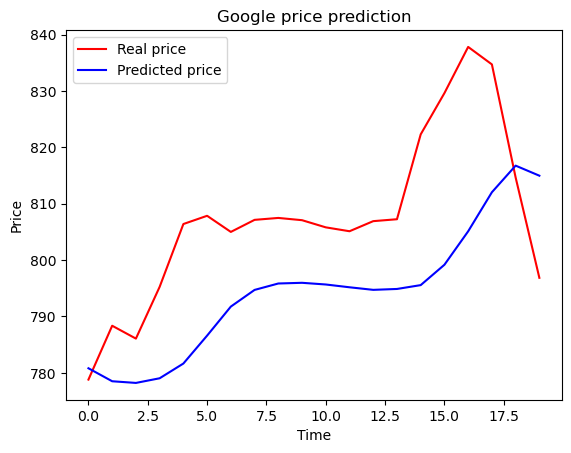

In [94]:
##visualize the prediction and real price
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')
plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()